<a href="https://colab.research.google.com/github/kelvinsima2/Cybersecurity-Data-Science/blob/main/CICIDS2017_Data_Science_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preamble

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Retrieval from Drive

In [ ]:
# Connect to drive
# Code adapted from [21COP528 Lab 8 ]
from google.colab import drive
drive.mount('/content/drive',force_remount=True)



Mounted at /content/drive


In [ ]:
# Define path for csv files in CICIDS2017 Dataset
path_Friday_afternoon_ddos = 'drive/My Drive/Data Science Project/CICIDS2017Data/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
path_Friday_afternoon_portscan = 'drive/My Drive/Data Science Project/CICIDS2017Data/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv'
path_Friday_morning = 'drive/My Drive/Data Science Project/CICIDS2017Data/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv'
path_Monday = 'drive/My Drive/Data Science Project/CICIDS2017Data/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv'
path_Thursday_afternoon = 'drive/My Drive/Data Science Project/CICIDS2017Data/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv'
path_Thursday_morning = 'drive/My Drive/Data Science Project/CICIDS2017Data/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv'
path_Tuesday = 'drive/My Drive/Data Science Project/CICIDS2017Data/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv'
path_Wednesday = 'drive/My Drive/Data Science Project/CICIDS2017Data/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv'




In [ ]:
pip install skimpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries
import pandas as pd
import numpy as np
from skimpy import clean_columns

# CICIDS2017 Dataset

In [ ]:
# Read csv files into pandas dataframes
df_fri_ddos = pd.read_csv(path_Friday_afternoon_ddos)
df_fri_ps = pd.read_csv(path_Friday_afternoon_portscan)
df_fri_morn = pd.read_csv(path_Friday_morning)
df_mon = pd.read_csv(path_Monday)
df_thur_aft = pd.read_csv(path_Thursday_afternoon)
df_thur_mor = pd.read_csv(path_Thursday_morning)
df_tues = pd.read_csv(path_Tuesday)
df_Wed = pd.read_csv(path_Wednesday)

## Data Cleaning

In [ ]:
# Check if column names match across all datasets
# Adapted from https://stackoverflow.com/questions/67335759/checking-if-column-headers-match-python

def match(x, y):
  x_columns = set(x.columns)
  y_columns = set(y.columns)
  columns_left = x_columns - y_columns

  print("Columns which don't match = ", columns_left)

match(df_fri_ddos,df_fri_ps)
match(df_fri_ps, df_fri_morn)
match(df_fri_morn, df_mon)
match(df_mon, df_thur_aft)
match(df_thur_aft, df_thur_mor)
match(df_thur_mor, df_tues)
match(df_tues, df_Wed)

Columns which don't match =  set()
Columns which don't match =  set()
Columns which don't match =  set()
Columns which don't match =  set()
Columns which don't match =  set()
Columns which don't match =  set()
Columns which don't match =  set()


In [ ]:
# Combine datasets
cicids2017_df = pd.concat([df_fri_ddos, df_fri_ps, df_fri_morn, df_mon, df_tues, df_Wed, df_thur_mor, df_thur_aft], axis=0)

# Clean column names
clean_cicids2017_df = clean_columns(cicids2017_df)

In [ ]:
# Display first 5 lines
clean_cicids2017_df.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
#Check number of unique values in the attack label column
clean_cicids2017_df['label'].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: label, dtype: int64

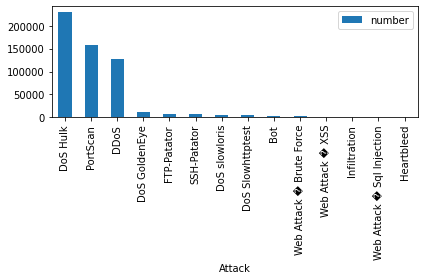

In [ ]:
# Visualize types of attacks and their quantities
import matplotlib.pyplot as plt

attacks_df = clean_cicids2017_df['label'].value_counts().to_frame().reset_index()
attacks_df.rename(columns={"index": "attack", 1: "y", "label": "number"}, inplace = True)
attacks_df.set_index('attack', inplace = True)

attacks_df.iloc[1:].plot (kind = "bar")
plt.xlabel('Attack')
plt.tight_layout()
plt.savefig('IDS-attacks.png')


In [ ]:
# Group label column to fewer attack categories
# Code adapted from [https://pythonguides.com/pandas-replace-multiple-values/]
clean_cicids2017_df["label"] = clean_cicids2017_df["label"].replace(dict.fromkeys(['Bot'], 'Botnet ARES'))
clean_cicids2017_df["label"] = clean_cicids2017_df["label"].replace(dict.fromkeys(['FTP-Patator', 'SSH-Patator'], 'Brute Force'))
clean_cicids2017_df["label"] = clean_cicids2017_df["label"].replace(dict.fromkeys(['DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest', 'DoS slowloris','Heartbleed'], 'DoS/DDoS'))
clean_cicids2017_df["label"] = clean_cicids2017_df["label"].replace(dict.fromkeys(['Web Attack � Brute Force', 'Web Attack � XSS', 'Web Attack � Sql Injection'], 'Web Attack'))



In [ ]:
#Check number of unique values in the attack label column
clean_cicids2017_df['label'].value_counts()

BENIGN          2273097
DoS/DDoS         380699
PortScan         158930
Brute Force       13835
Web Attack         2180
Botnet ARES        1966
Infiltration         36
Name: label, dtype: int64

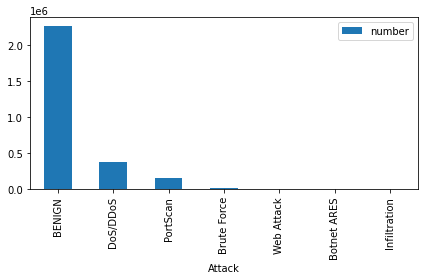

In [ ]:
# Visualize types of attacks and their quantities
import matplotlib.pyplot as plt

attacks_df = clean_cicids2017_df['label'].value_counts().to_frame().reset_index()
attacks_df.rename(columns={"index": "attack", 1: "y", "label": "number"}, inplace = True)
attacks_df.set_index('attack', inplace = True)

attacks_df.plot (kind = "bar")
plt.xlabel('Attack')
plt.tight_layout()
plt.savefig('IDS-attacks-categorized.png')

In [ ]:
# Check data types which exist across all columns
set(clean_cicids2017_df.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [ ]:
# Remove infinite values by changing them to nan. Adapted from https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas
clean_cicids2017_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:

# Check for nan values
clean_cicids2017_df.isnull().sum().sort_values(ascending = False)


flow_packets_s         2867
flow_bytes_s           2867
destination_port          0
average_packet_size       0
fwd_avg_bulk_rate         0
                       ... 
bwd_iat_std               0
bwd_iat_mean              0
bwd_iat_total             0
fwd_iat_min               0
label                     0
Length: 79, dtype: int64

In [ ]:
# Drop all rows with missing values and check missing values

clean_cicids2017_df.dropna(inplace = True)
clean_cicids2017_df.isnull().sum().sort_values(ascending = False)


destination_port        0
ece_flag_count          0
fwd_avg_packets_bulk    0
fwd_avg_bytes_bulk      0
fwd_header_length_1     0
                       ..
bwd_iat_total           0
fwd_iat_min             0
fwd_iat_max             0
fwd_iat_std             0
label                   0
Length: 79, dtype: int64

In [ ]:
# Remove infiltration from label column in dataset since it will create too small a sample
clean_cicids2017_df = clean_cicids2017_df[clean_cicids2017_df.label != 'Infiltration']

In [ ]:
# Sample dataset randomly
# code adapted from [https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/]
# import library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable

# fit predictor and target variable
x = clean_cicids2017_df.loc[:, clean_cicids2017_df.columns != 'label']
y = clean_cicids2017_df.loc[:, clean_cicids2017_df.columns == 'label']
x_rus, y_rus = rus.fit_resample(x, y)


In [ ]:
clean_cicids2017_df = pd.concat([x_rus,y_rus], axis = 1)

In [ ]:
#Check number of unique values in the label column
clean_cicids2017_df['label'].value_counts()

BENIGN         1956
Botnet ARES    1956
Brute Force    1956
DoS/DDoS       1956
PortScan       1956
Web Attack     1956
Name: label, dtype: int64

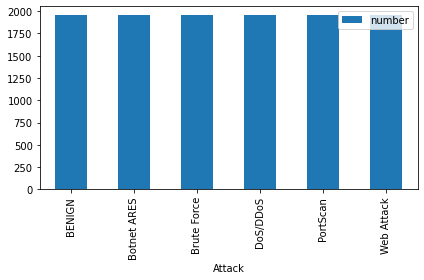

In [ ]:
attacks_df = clean_cicids2017_df['label'].value_counts().to_frame().reset_index()
attacks_df.rename(columns={"index": "attack", 1: "y", "label": "number"}, inplace = True)
attacks_df.set_index('attack', inplace = True)

attacks_df.plot (kind = "bar")
plt.xlabel('Attack')
plt.tight_layout()
plt.savefig('IDS-attacks-sampled.png')


### Data Normalization and Feature Selection

In [ ]:
# Check which columns have data types as integer, float and object respectively
clean_cicids2017_df.columns.to_series().groupby(clean_cicids2017_df.dtypes).groups

{int64: ['destination_port', 'flow_duration', 'total_fwd_packets', 'total_backward_packets', 'total_length_of_fwd_packets', 'total_length_of_bwd_packets', 'fwd_packet_length_max', 'fwd_packet_length_min', 'bwd_packet_length_max', 'bwd_packet_length_min', 'flow_iat_max', 'flow_iat_min', 'fwd_iat_total', 'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length', 'bwd_header_length', 'min_packet_length', 'max_packet_length', 'fin_flag_count', 'syn_flag_count', 'rst_flag_count', 'psh_flag_count', 'ack_flag_count', 'urg_flag_count', 'cwe_flag_count', 'ece_flag_count', 'down_up_ratio', 'fwd_header_length_1', 'fwd_avg_bytes_bulk', 'fwd_avg_packets_bulk', 'fwd_avg_bulk_rate', 'bwd_avg_bytes_bulk', 'bwd_avg_packets_bulk', 'bwd_avg_bulk_rate', 'subflow_fwd_packets', 'subflow_fwd_bytes', 'subflow_bwd_packets', 'subflow_bwd_bytes', 'init_win_bytes_forward', 'init_win_bytes_backward', 'act_dat

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.05201763 0.01981982 0.01324989 0.02066678 0.00538207 0.00942899
 0.00577004 0.01765742 0.00840274 0.00410356 0.02249304 0.03038588
 0.03051723 0.0087657  0.0034965  0.00810685 0.01234939 0.02579973
 0.01864809 0.00277003 0.01317918 0.01386232 0.02138712 0.01822277
 0.00672452 0.00903505 0.00683699 0.00499515 0.00678984 0.00415264
 0.01420799 0.         0.         0.         0.01825981 0.02237659
 0.00702881 0.01121537 0.01950017 0.00999528 0.01901753 0.015757
 0.00593571 0.00235949 0.01685093 0.         0.0591393  0.03402651
 0.02270615 0.         0.         0.01911013 0.01826277 0.0084105
 0.02261903 0.02213678 0.         0.         0.         0.
 0.         0.         0.01714742 0.00691302 0.01697364 0.00875405
 0.04685554 0.04319315 0.0086768  0.03887569 0.00051189 0.00032061
 0.00043657 0.00027955 0.00468149 0.00023586 0.00818783 0.00402409]


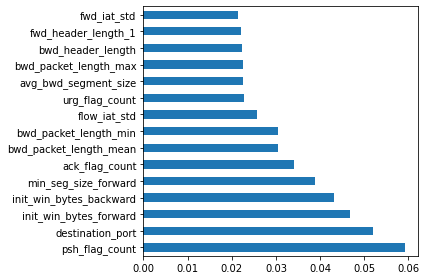

In [ ]:
# This section checks which features have the greatest effect on the target.
# Code adapted from [https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e]
X = clean_cicids2017_df.loc[:, clean_cicids2017_df.columns != 'label']
y = clean_cicids2017_df.loc[:, clean_cicids2017_df.columns == 'label']
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

plt.tight_layout()
plt.savefig('IDS-feature importance.png')
plt.show()

In [ ]:
feature_columns = list(dict(feat_importances.nlargest(10)).keys())

In [ ]:
# separate target and features

cicids2017_target = np.asarray(clean_cicids2017_df.loc[:, clean_cicids2017_df.columns == 'label'])
cicids2017_features = np.asarray(clean_cicids2017_df[feature_columns])


In [ ]:
# Normalize features using standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cicids2017_features = scaler.fit_transform(cicids2017_features)

scaled_cicids2017_features

array([[-1.19406691e+00, -4.22706492e-01, -8.77610326e-01, ...,
         3.95550789e+00, -3.91503318e-01, -3.79875996e-01],
       [-1.19406691e+00, -4.22706492e-01, -8.77610326e-01, ...,
         4.80532682e+00, -3.88333020e-01, -3.79875996e-01],
       [-1.19406691e+00, -4.22706492e-01, -8.77610326e-01, ...,
         2.65245220e+00, -3.91489614e-01, -3.79875996e-01],
       ...,
       [ 8.37474008e-01, -4.20830762e-01,  1.22972262e+00, ...,
        -2.93586758e-01, -3.03510323e-03, -3.79875996e-01],
       [-1.19406691e+00, -4.20830762e-01, -7.73329784e-01, ...,
        -2.93586758e-01, -3.91503318e-01,  2.63243798e+00],
       [ 8.37474008e-01, -4.20830762e-01,  1.22972262e+00, ...,
        -2.93586758e-01,  6.06550511e-02, -3.79875996e-01]])

### Split Data

In [ ]:
# Split data into training and testing splits 
from sklearn.model_selection import train_test_split

X = scaled_cicids2017_features
y = np.ravel(cicids2017_target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

## CatBoost Classifier

In [ ]:
# [Adapted from https://towardsdatascience.com/mastering-fast-gradient-boosting-on-google-colaboratory-with-free-gpu-65c1dd47d1c5] 
#Create a Gaussian Classifier
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
clf= CatBoostClassifier(iterations = 100, learning_rate = 0.03,task_type='CPU')

#Train the model using the training sets y_pred=clf.predict(X_test)
st_train = time.time()
clf.fit(X_train,y_train)
et_train = time.time()
print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred=clf.predict(X_test)
et_test = time.time()
print("Testing time = " + str(et_test-st_test) + " seconds")

y_unique = list(np.unique(y_test))

print(classification_report(y_test, y_pred, labels=y_unique))

cm = confusion_matrix(y_test, y_pred)

0:	learn: 1.6691331	total: 11.5ms	remaining: 1.13s
1:	learn: 1.5671311	total: 20.5ms	remaining: 1s
2:	learn: 1.4728800	total: 29ms	remaining: 937ms
3:	learn: 1.3956115	total: 37.1ms	remaining: 891ms
4:	learn: 1.3240454	total: 45.2ms	remaining: 859ms
5:	learn: 1.2561268	total: 53.3ms	remaining: 836ms
6:	learn: 1.1957903	total: 61.8ms	remaining: 821ms
7:	learn: 1.1443500	total: 72.5ms	remaining: 833ms
8:	learn: 1.0919188	total: 80.9ms	remaining: 818ms
9:	learn: 1.0445292	total: 89.2ms	remaining: 803ms
10:	learn: 1.0017913	total: 97.5ms	remaining: 789ms
11:	learn: 0.9633388	total: 105ms	remaining: 772ms
12:	learn: 0.9264191	total: 113ms	remaining: 754ms
13:	learn: 0.8925813	total: 121ms	remaining: 741ms
14:	learn: 0.8588250	total: 130ms	remaining: 737ms
15:	learn: 0.8274162	total: 139ms	remaining: 727ms
16:	learn: 0.7982451	total: 147ms	remaining: 720ms
17:	learn: 0.7714606	total: 155ms	remaining: 708ms
18:	learn: 0.7447985	total: 164ms	remaining: 698ms
19:	learn: 0.7201485	total: 173ms	r

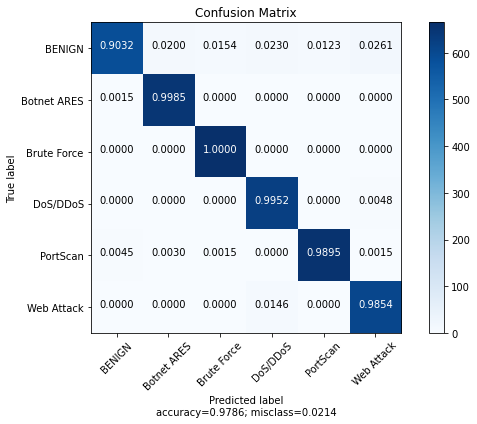

In [ ]:
# code adapted from [http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html]
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    


plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('IDS catboost confusion matrix.png')
plt.show()

## K Nearest Neighbour

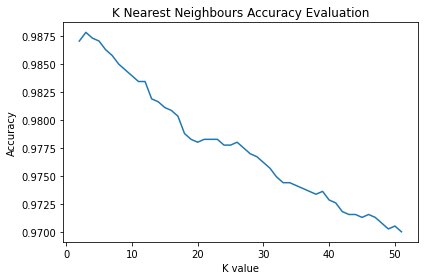

Optimum value: k =  3
Training time = 0.025371074676513672 seconds
Testing time = 0.06523966789245605 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      BENIGN       0.99      0.94      0.97       651
 Botnet ARES       0.99      1.00      0.99       650
 Brute Force       1.00      1.00      1.00       665
    DoS/DDoS       0.99      1.00      0.99       627
    PortScan       0.99      0.99      0.99       664
  Web Attack       0.98      1.00      0.99       616

    accuracy                           0.99      3873
   macro avg       0.99      0.99      0.99      3873
weighted avg       0.99      0.99      0.99      3873

The confusion matrix for the training set is:



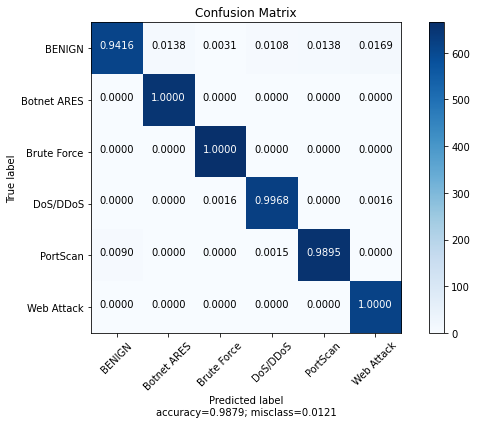

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# Create arrays with zeros to store accuracy data.
accuracy_array = np.zeros(50)
k_array = np.zeros(50)

# Loop through models with increasing values of n_neighbours
for k in np.arange(50):
    clf_kNN = KNeighborsClassifier(n_neighbors=k+2, weights='distance')
    clf_kNN.fit(X_train, y_train)
    y_pred=clf_kNN.predict(X_test)

    # Store accuracy in an array
    accuracy_array[k] = accuracy_score(y_test, y_pred)
    k_array[k] = k+2

# Plot accuracy against n_neighbours value.  
plt.plot(k_array, accuracy_array)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K Nearest Neighbours Accuracy Evaluation')
plt.tight_layout()
plt.savefig('IDS-KNN-parameters.png')
plt.show()

print("Optimum value: k = ", list(accuracy_array).index(max(accuracy_array))+2)
    
# Use the n_neighbours value with the highest accuracy to make the final model.
clf_kNN = KNeighborsClassifier(n_neighbors=list(accuracy_array).index(max(accuracy_array))+2, weights='distance')

st_train = time.time()
clf_kNN.fit(X_train, y_train)
et_train = time.time()
print("Training time = " + str(et_train-st_train) + " seconds")


st_test = time.time()
y_pred=clf_kNN.predict(X_test)
et_test = time.time()
print("Testing time = " + str(et_test-st_test) + " seconds")

y_conf=clf_kNN.predict_proba(X_test)

# Get classification report of the model.

print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('IDS KNN confusion matrix.png')
plt.show()


## Stochastic Gradient Descent




Training time = 0.12805938720703125 seconds
Testing time = 0.0008449554443359375 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      BENIGN       0.99      0.60      0.75       651
 Botnet ARES       0.87      0.74      0.80       650
 Brute Force       0.73      1.00      0.85       665
    DoS/DDoS       0.85      0.79      0.82       627
    PortScan       0.78      0.99      0.88       664
  Web Attack       0.92      0.89      0.91       616

    accuracy                           0.84      3873
   macro avg       0.86      0.84      0.83      3873
weighted avg       0.86      0.84      0.83      3873

The confusion matrix for the training set is:



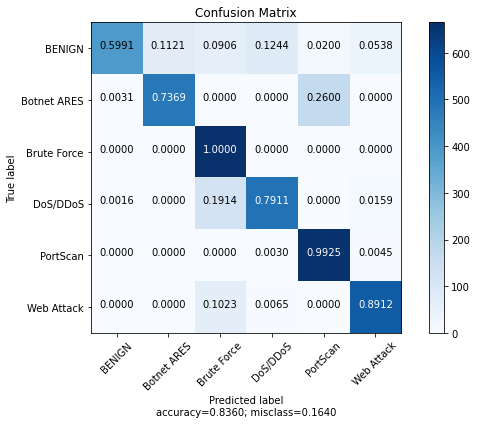

In [ ]:
from sklearn.linear_model import SGDClassifier
clf_sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=1000)

st_train = time.time()
clf_sgd.fit(X_train, y_train)
et_train = time.time()
print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred=clf_sgd.predict(X_test)
et_test = time.time()
print("Testing time = " + str(et_test-st_test) + " seconds")

print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('IDS SGD confusion matrix.png')
plt.show()

## SVM

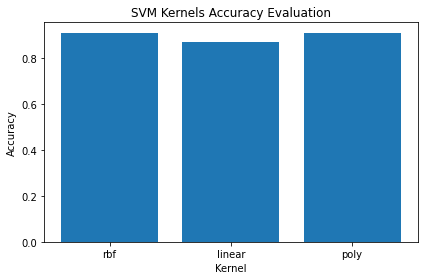

Best model =  rbf
Training time = 2.6455559730529785 seconds
Testing time = 0.4856092929840088 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      BENIGN       0.99      0.78      0.87       651
 Botnet ARES       0.95      1.00      0.97       650
 Brute Force       0.76      1.00      0.86       665
    DoS/DDoS       0.92      0.80      0.85       627
    PortScan       0.97      0.99      0.98       664
  Web Attack       0.94      0.89      0.92       616

    accuracy                           0.91      3873
   macro avg       0.92      0.91      0.91      3873
weighted avg       0.92      0.91      0.91      3873

The confusion matrix for the training set is:



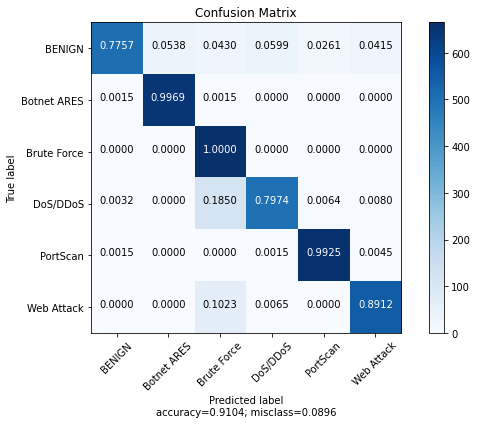

In [ ]:
from sklearn.svm import SVC
from sklearn import svm

kernels = ['rbf', 'linear', 'poly']

# Create array with zeros to store accuracy data.
accuracy_array = np.zeros(3)

# Loop through models with different types of kernels
for i, kernel in enumerate(kernels):
    model = svm.SVC(kernel=kernel)
    clf_svm = model.fit(X_train, y_train)
    y_pred=clf_svm.predict(X_test)
    accuracy_array[i] = accuracy_score(y_test, y_pred)

# Plot bar graph of accuracy of different kernels
plt.bar(kernels, accuracy_array)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('SVM Kernels Accuracy Evaluation')
plt.tight_layout()
plt.savefig('IDS-SVM-parameters.png')
plt.show()

# Take the best kernel and use it to make the final SVM model 
print("Best model = ", kernels[list(accuracy_array).index(max(accuracy_array))])
model = svm.SVC(kernel=kernels[list(accuracy_array).index(max(accuracy_array))], probability = True)

st_train = time.time()
clf_svm = model.fit(X_train, y_train)
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred=clf_svm.predict(X_test)
et_test = time.time()
print("Testing time = " + str(et_test-st_test) + " seconds")


print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('IDS SVM confusion matrix.png')
plt.show()


## AdaBoost

Training time = 2.8245298862457275 seconds
Testing time = 0.12900972366333008 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      BENIGN       1.00      0.94      0.97       651
 Botnet ARES       0.99      1.00      1.00       650
 Brute Force       0.99      1.00      1.00       665
    DoS/DDoS       0.96      0.99      0.97       627
    PortScan       1.00      1.00      1.00       664
  Web Attack       0.98      0.99      0.98       616

    accuracy                           0.99      3873
   macro avg       0.99      0.99      0.99      3873
weighted avg       0.99      0.99      0.99      3873

The confusion matrix for the training set is:



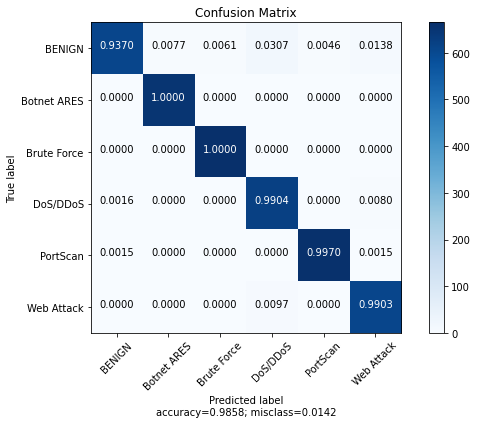

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create AdaBoost classifier model with decision tree as base estimator
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1)
clf_A = AdaBoostClassifier(n_estimators=100, random_state=0,
                                   base_estimator=dtree,
                                   learning_rate=0.0005,
                                   algorithm = 'SAMME')
st_train = time.time()
clf_A.fit(X_train, y_train)
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = clf_A.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('IDS AdaBoost confusion matrix.png')
plt.show()


## Decision Tree

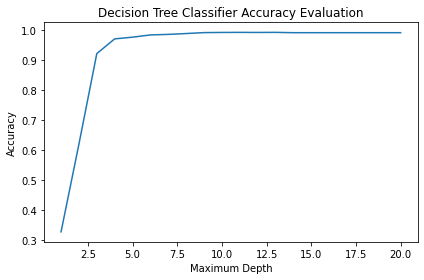

Optimum value: max depth =  11
Training time = 0.031012296676635742 seconds
Testing time = 0.0018069744110107422 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      BENIGN       0.98      0.98      0.98       651
 Botnet ARES       1.00      1.00      1.00       650
 Brute Force       1.00      1.00      1.00       665
    DoS/DDoS       0.99      0.99      0.99       627
    PortScan       1.00      0.99      0.99       664
  Web Attack       0.99      1.00      0.99       616

    accuracy                           0.99      3873
   macro avg       0.99      0.99      0.99      3873
weighted avg       0.99      0.99      0.99      3873

The confusion matrix for the training set is:



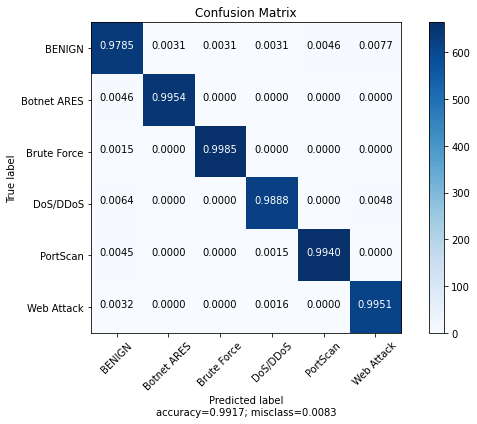

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Create zero arrays to store accuracy and depth values.
accuracy_array = np.zeros(20)
depth_array = np.zeros(20)

# Loop through models with different values of max_depth
for depth in np.arange(20):
    model_tree = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=depth+1, min_samples_leaf=2)
    model_tree.fit(X_train,y_train) 
    y_pred = model_tree.predict(X_test)
    # Store accuracy and depth values in arrats
    depth_array[depth] = depth + 1
    accuracy_array[depth] = accuracy_score(y_test, y_pred)

# Plot accuracy against max_depth 
plt.plot(depth_array, accuracy_array)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy Evaluation')
plt.tight_layout()
plt.savefig('IDS-Dtree-parameters.png')
plt.show()

# Obtain best depth.
good_depth = list(accuracy_array).index(max(accuracy_array))+1

print("Optimum value: max depth = ", good_depth)

# Create final decision tree model using best depth
model_tree = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=good_depth, min_samples_leaf=2)
st_train = time.time()
model_tree.fit(X_train,y_train) 
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")


st_test = time.time()
y_pred = model_tree.predict(X_test)
et_test = time.time()
print("Testing time = " + str(et_test-st_test) + " seconds")

# Get classification report and confusion matrix
print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('IDS Dtree confusion matrix.png')
plt.show()




## Random Forest

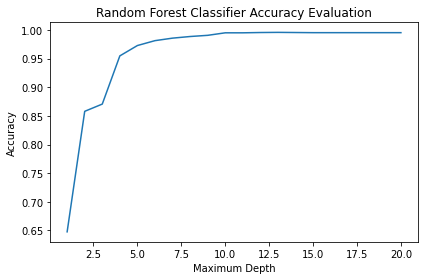

Optimum value: max depth =  13


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Create zero arrays to store accuracy and depth values.
accuracy_array = np.zeros(20)
depth_array = np.zeros(20)

# Loop through models with different values of max_depth
for depth in np.arange(20):
    clf_rf = RandomForestClassifier(random_state=0, max_depth=depth+1, )
    clf_rf.fit(X_train,y_train) 
    y_pred = clf_rf.predict(X_test)
    # Store accuracy and depth values in arrays
    depth_array[depth] = depth + 1
    accuracy_array[depth] = accuracy_score(y_test, y_pred)

# Plot accuracy against max_depth 
plt.plot(depth_array, accuracy_array)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy Evaluation')
plt.tight_layout()
plt.savefig('IDS-RF-parameters.png')
plt.show()

# Obtain best depth.
good_depth = list(accuracy_array).index(max(accuracy_array))+1

print("Optimum value: max depth = ", good_depth)

Training time = 0.5268111228942871 seconds
Training time = 0.06132841110229492 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      BENIGN       1.00      0.98      0.99       651
 Botnet ARES       1.00      1.00      1.00       650
 Brute Force       1.00      1.00      1.00       665
    DoS/DDoS       1.00      1.00      1.00       627
    PortScan       1.00      1.00      1.00       664
  Web Attack       0.99      1.00      1.00       616

    accuracy                           1.00      3873
   macro avg       1.00      1.00      1.00      3873
weighted avg       1.00      1.00      1.00      3873

The confusion matrix for the training set is:



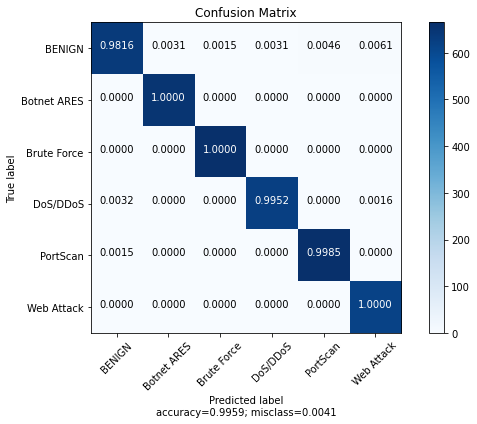

In [ ]:


clf_rf = RandomForestClassifier(max_depth=good_depth, random_state=0)
st_train = time.time()
clf_rf.fit(X_train,y_train) 
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = clf_rf.predict(X_test)
et_test = time.time()

print("Training time = " + str(et_test-st_test) + " seconds")

# Get classification report and confusion matrix
print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('IDS RF confusion matrix.png')
plt.show()

## Naive Bayes

Training time = 0.016576051712036133 seconds
Testing time = 0.004572868347167969 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      BENIGN       0.98      0.68      0.80       651
 Botnet ARES       0.78      0.74      0.76       650
 Brute Force       0.99      1.00      1.00       665
    DoS/DDoS       0.93      0.99      0.96       627
    PortScan       0.79      0.99      0.88       664
  Web Attack       0.94      0.98      0.96       616

    accuracy                           0.90      3873
   macro avg       0.90      0.90      0.89      3873
weighted avg       0.90      0.90      0.89      3873

The confusion matrix for the training set is:



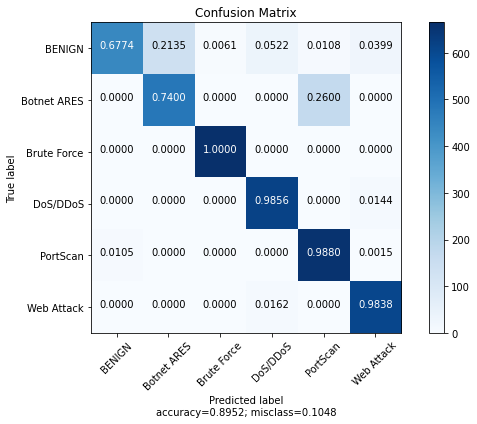

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

st_train = time.time()
gnb.fit(X_train,y_train) 
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = gnb.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

# Get classification report and confusion matrix
print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('IDS GNB confusion matrix.png')
plt.show()


## MLP

In [ ]:

from sklearn.neural_network import MLPClassifier

# separate target and features

cicids2017_target = np.asarray(clean_cicids2017_df.loc[:, clean_cicids2017_df.columns == 'label'])
cicids2017_features = np.asarray(clean_cicids2017_df.loc[:, clean_cicids2017_df.columns != 'label'])

# Normalize features using standard scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_cicids2017_features = scaler.fit_transform(cicids2017_features)


# Split data into training and testing splits 
from sklearn.model_selection import train_test_split

X = scaled_cicids2017_features
y = np.ravel(cicids2017_target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



Training time = 19.31999969482422 seconds
Testing time = 0.022652149200439453 seconds
The classification report for the training set is: 

              precision    recall  f1-score   support

      BENIGN       1.00      0.95      0.97       651
 Botnet ARES       0.98      1.00      0.99       650
 Brute Force       0.97      0.99      0.98       665
    DoS/DDoS       0.97      0.99      0.98       627
    PortScan       0.99      1.00      1.00       664
  Web Attack       0.98      0.96      0.97       616

    accuracy                           0.98      3873
   macro avg       0.98      0.98      0.98      3873
weighted avg       0.98      0.98      0.98      3873

The confusion matrix for the training set is:



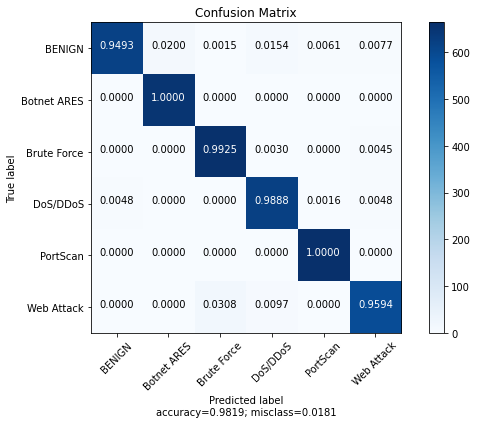

In [ ]:
#Initializing the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)


#Fitting the training data to the network
st_train = time.time()
mlp.fit(X_train, y_train)
et_train = time.time()

print("Training time = " + str(et_train-st_train) + " seconds")

st_test = time.time()
y_pred = mlp.predict(X_test)
et_test = time.time()

print("Testing time = " + str(et_test-st_test) + " seconds")

# Get classification report and confusion matrix
print('The classification report for the training set is: \n')
print(classification_report(y_test, y_pred, labels=y_unique))
print('The confusion matrix for the training set is:\n')
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm = cm, target_names = y_unique, title = 'Confusion Matrix')
plt.tight_layout()
plt.savefig('IDS MLP confusion matrix.png')
plt.show()